In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl
import Pacejka52_Sv_Sh_0 as pa52_0
import Pacejka52_params_comp as pa

Fz = 4000
Fz0 = 3114
IA = np.linspace(-3,3,3)
i=1000
Sy = np.linspace(-0.3,0.3,i)
Sx = np.linspace(-1,1,i)

Text(0, 0.5, 'Fy [N]')

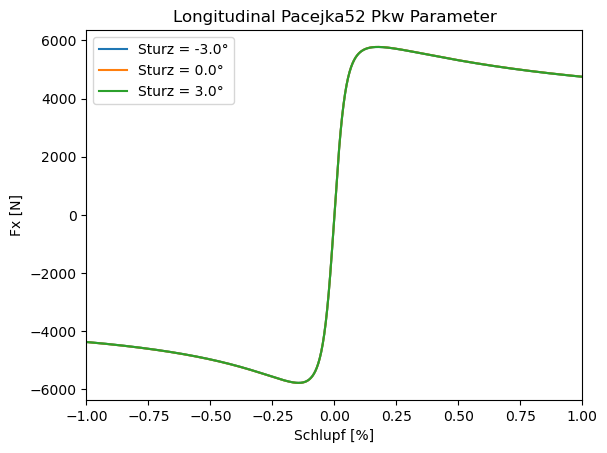

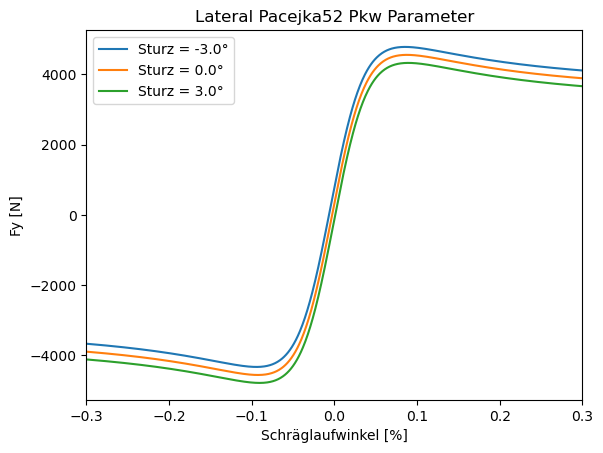

In [2]:
plt.figure(1)
for j in range(0,len(IA)):
    Fy_indy = pa.Pacejka52_long(Fz,Sx,IA[j],Fz0,'pkw')[0]
    plt.plot(Sx,Fy_indy, label = f"Sturz = {IA[j]}°")
plt.legend()
plt.title('Longitudinal Pacejka52 Pkw Parameter')
plt.xlim(-1,1)
plt.xlabel('Schlupf [%]')
plt.ylabel('Fx [N]')

plt.figure(2)
for j in range(0,len(IA)):
    Fy_pkw =  pa.Pacejka52_lat(Fz,Sy,IA[j],Fz0,'pkw')[0]
    plt.plot(Sy,Fy_pkw, label = f"Sturz = {IA[j]}°")
plt.legend()
plt.title('Lateral Pacejka52 Pkw Parameter')
plt.xlim(-0.3,0.3)
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Fy [N]')


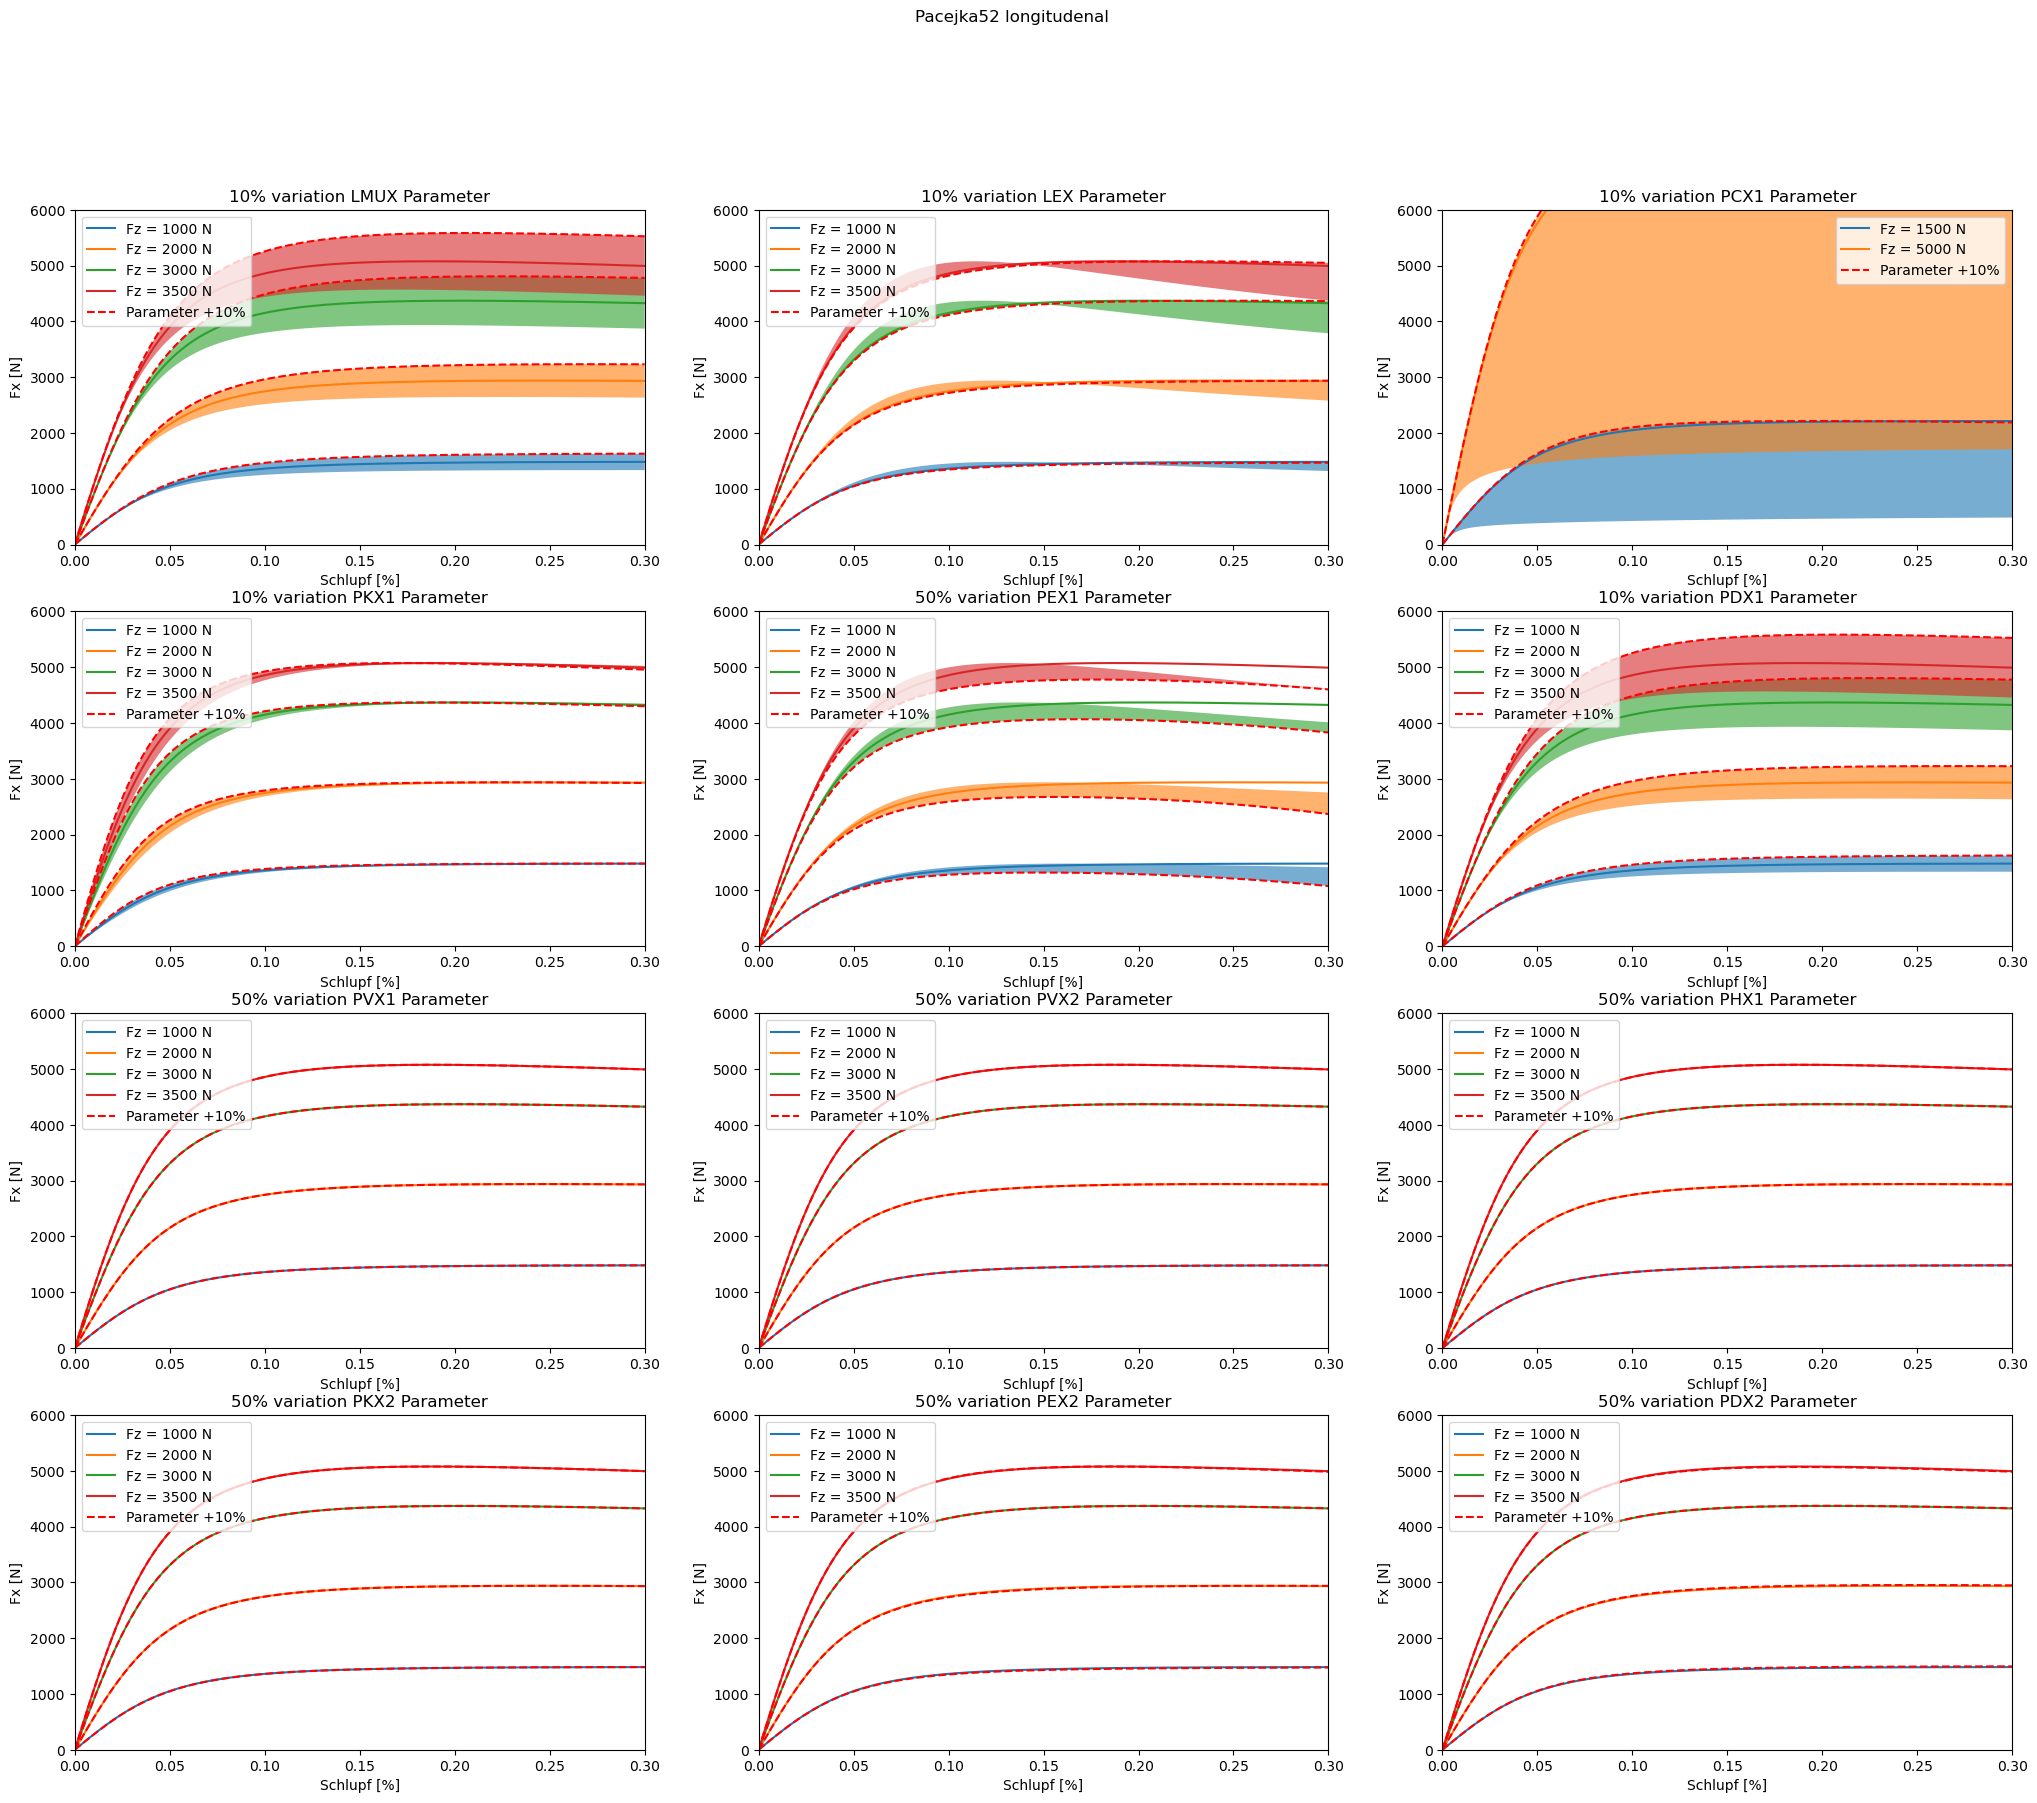

In [18]:
sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_pkw as pa

Fz = [1000, 2000, 3000, 3500]
Sx = np.linspace(0,0.3,1000)
Fz0 = 3114

fig, ax = plt.subplots(4,3, figsize = (25,20))
fig.suptitle('Pacejka52 longitudenal')
for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LMUX_pos =   pa.LMUX * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_pos, pa.LEX )[0]
    ax[0, 0].plot(Sx,Fx_pos, 'r--')

    LMUX_neg =   pa.LMUX * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_neg, pa.LEX )[0]
    ax[0,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)

ax[0,0].set_title('10% variation LMUX Parameter')
ax[0,0].set_ylabel('Fx [N]')
ax[0,0].set_xlabel('Schlupf [%]')
ax[0,0].set_xlim((0,0.3))
ax[0,0].set_ylim((0,6000))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDX1_pos =   pa.PDX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, PDX1_pos, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 2].plot(Sx,Fx_pos, 'r--')

    PDX1_neg =   pa.PDX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, PDX1_neg, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,2].set_title('10% variation PDX1 Parameter')
ax[1,2].set_ylabel('Fx [N]')
ax[1,2].set_xlabel('Schlupf [%]')
ax[1,2].set_xlim((0,0.3))
ax[1,2].set_ylim((0,6000))
ax[1,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDX2_pos =   pa.PDX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,PDX2_pos, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3, 2].plot(Sx,Fx_pos, 'r--')

    PDX2_neg =   pa.PDX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, PDX2_neg, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,2].set_title('50% variation PDX2 Parameter')
ax[3,2].set_ylabel('Fx [N]')
ax[3,2].set_xlabel('Schlupf [%]')
ax[3,2].set_xlim((0,0.3))
ax[3,2].set_ylim((0,6000))
ax[3,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKX1_pos =  pa.PKX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, PKX1_pos, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 0].plot(Sx,Fx_pos, 'r--')

    PKX1_neg =   pa.PKX1 * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, PKX1_neg, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,  pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,0].set_title('10% variation PKX1 Parameter')
ax[1,0].set_ylabel('Fx [N]')
ax[1,0].set_xlabel('Schlupf [%]')
ax[1,0].set_xlim((0,0.3))
ax[1,0].set_ylim((0,6000))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[1,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEX1_pos =   pa.PEX1 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, PEX1_pos, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1, 1].plot(Sx,Fx_pos, 'r--')

    PEX1_neg =   pa.PEX1 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, PEX1_neg, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[1,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[1,1].set_title('50% variation PEX1 Parameter')
ax[1,1].set_ylabel('Fx [N]')
ax[1,1].set_xlabel('Schlupf [%]')
ax[1,1].set_xlim((0,0.3))
ax[1,1].set_ylim((0,6000))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LEX_pos =   pa.LEX * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, LEX_pos )[0]
    ax[0, 1].plot(Sx,Fx_pos, 'r--')

    LEX_neg =   pa.LEX * 0.1
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, LEX_neg )[0]
    ax[0,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[0,1].set_title('10% variation LEX Parameter')
ax[0,1].set_ylabel('Fx [N]')
ax[0,1].set_xlabel('Schlupf [%]')
ax[0,1].set_xlim((0,0.3))
ax[0,1].set_ylim((0,6000))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVX1_pos =   pa.PVX1 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,PVX1_pos, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[2, 0].plot(Sx,Fx_pos, 'r--')

    PVX1_neg =   pa.PVX1 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, PVX1_neg, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[2,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,0].set_title('50% variation PVX1 Parameter')
ax[2,0].set_ylabel('Fx [N]')
ax[2,0].set_xlabel('Schlupf [%]')
ax[2,0].set_xlim((0,0.3))
ax[2,0].set_ylim((0,6000))
ax[2,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVX2_pos =   pa.PVX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, PVX2_pos,  pa.LMUX,pa.LEX )[0]
    ax[2, 1].plot(Sx,Fx_pos, 'r--')

    PVX2_neg =   pa.PVX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, PVX2_neg,  pa.LMUX, pa.LEX )[0]
    ax[2,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,1].set_title('50% variation PVX2 Parameter')
ax[2,1].set_ylabel('Fx [N]')
ax[2,1].set_xlabel('Schlupf [%]')
ax[2,1].set_xlim((0,0.3))
ax[2,1].set_ylim((0,6000))
ax[2,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[2,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PHX1_pos = pa.PHX1 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,PHX1_pos, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[2, 2].plot(Sx,Fx_pos, 'r--')

    PHX1_neg = pa.PHX1 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,PHX1_neg, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[2,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[2,2].set_title('50% variation PHX1 Parameter')
ax[2,2].set_ylabel('Fx [N]')
ax[2,2].set_xlabel('Schlupf [%]')
ax[2,2].set_xlim((0,0.3))
ax[2,2].set_ylim((0,6000))
ax[2,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])


for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKX2_pos =    pa.PKX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, PKX2_pos, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[3, 0].plot(Sx,Fx_pos, 'r--')

    PKX2_neg =   pa.PKX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, PKX2_neg, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,0].set_title('50% variation PKX2 Parameter')
ax[3,0].set_ylabel('Fx [N]')
ax[3,0].set_xlabel('Schlupf [%]')
ax[3,0].set_xlim((0,0.3))
ax[3,0].set_ylim((0,6000))
ax[3,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[3,1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEX2_pos =   pa.PEX2 * 1.5
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, PEX2_pos, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[3, 1].plot(Sx,Fx_pos, 'r--')

    PEX2_neg =   pa.PEX2 * 0.5
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1,PEX2_neg, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[3,1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[3,1].set_title('50% variation PEX2 Parameter')
ax[3,1].set_ylabel('Fx [N]')
ax[3,1].set_xlabel('Schlupf [%]')
ax[3,1].set_xlim((0,0.3))
ax[3,1].set_ylim((0,6000))
ax[3,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"])

Fz = [1500, 5000]
for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0,2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PCX1_pos = pa.PCX1 * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, PCX1_pos, pa.PDX1,pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4,pa.PVX1, pa.PVX2,  pa.LMUX,pa.LEX )[0]
    ax[0, 2].plot(Sx,Fx_pos, 'r--')

    PCX1_neg = pa.PCX1 * 0.1
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, PCX1_neg, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX, pa.LEX )[0]
    ax[0,2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
    
ax[0,2].set_title('10% variation PCX1 Parameter')
ax[0,2].set_ylabel('Fx [N]')
ax[0,2].set_xlabel('Schlupf [%]')
ax[0,2].set_xlim((0,0.3))
ax[0,2].set_ylim((0,6000))
ax[0,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N","Parameter +10%"])


674.2341040462429


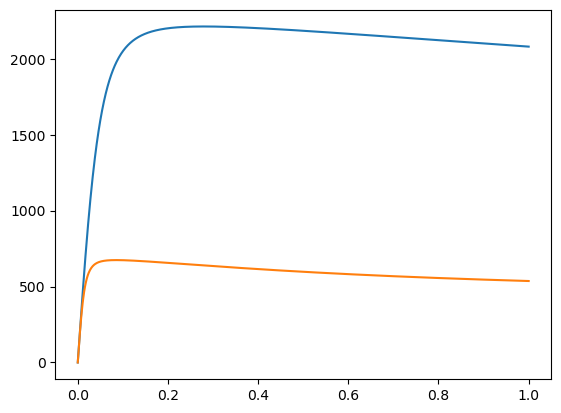

In [11]:
S=np.linspace(0,1,1000)
sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_pkw as pa
F = pa52gl.Pacejka52_long(S,1500,Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX , pa.LEX)[0]
F2 = pa52gl.Pacejka52_long(S,1500,Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, 2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX , pa.LEX)[0]
print(pa52gl.Pacejka52_long(S,1500,Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, 2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2,  pa.LMUX , pa.LEX)[1])

plt.plot(S,F)
plt.plot(S,F2)

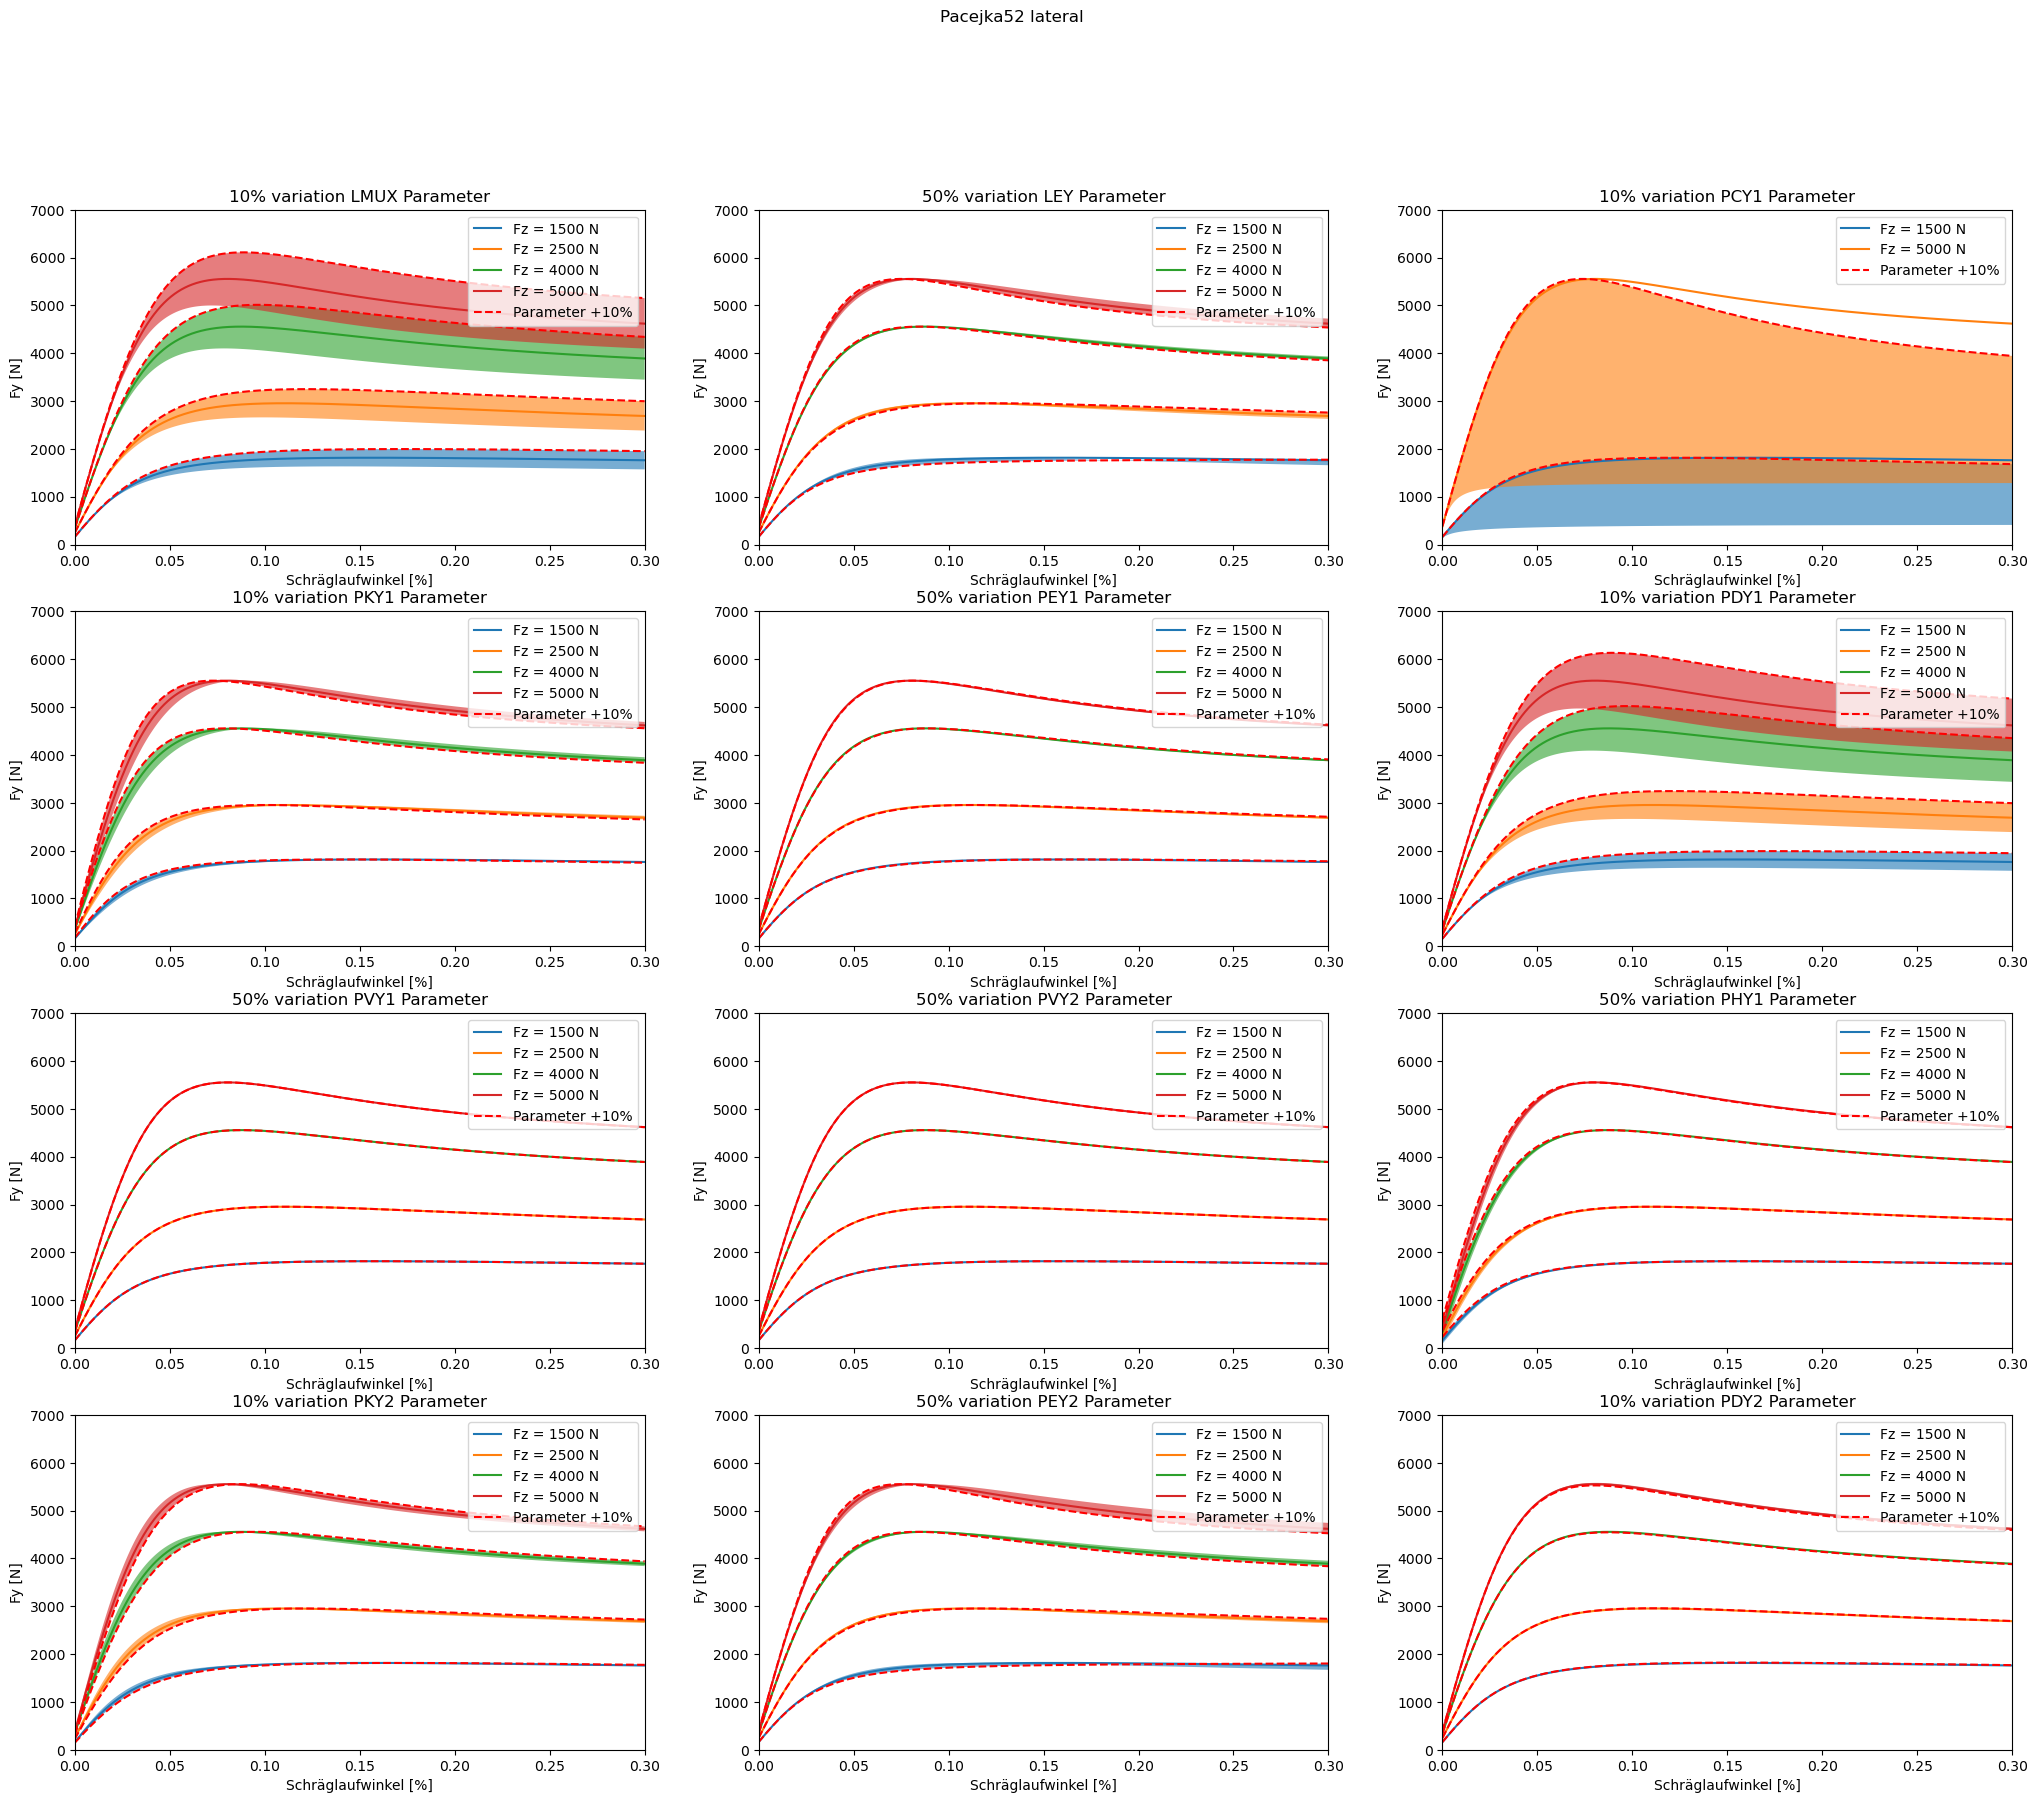

In [16]:
Fz = [1500, 2500, 4000, 5000]
Sy = np.linspace(0,0.3,1000)
Fz0 = 3114

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_pkw as pa

fig, ax = plt.subplots(4,3, figsize = (25,20))
fig.suptitle('Pacejka52 lateral')
for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LMUX_pos =   pa.LMUX * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,LMUX_pos, pa.LEY)[0]
    ax[0, 0].plot(Sy,Fy_pos, 'r--')

    LMUX_neg =   pa.LMUX * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, LMUX_neg, pa.LEY)[0]
    ax[0,0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,0].set_title('10% variation LMUX Parameter')
ax[0,0].set_ylabel('Fy [N]')
ax[0,0].set_xlabel('Schräglaufwinkel [%]')
ax[0,0].set_xlim((0,0.3))
ax[0,0].set_ylim((0,7000))
ax[0,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LEY_pos =   pa.LEY * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY,LEY_pos)[0]
    ax[0, 1].plot(Sy,Fy_pos, 'r--')

    LEY_neg =   pa.LEY * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, LEY_neg)[0]
    ax[0,1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,1].set_title('50% variation LEY Parameter')
ax[0,1].set_ylabel('Fy [N]')
ax[0,1].set_xlabel('Schräglaufwinkel [%]')
ax[0,1].set_xlim((0,0.3))
ax[0,1].set_ylim((0,7000))
ax[0,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

Fz1 = [1500, 5000]
for j in range(len(Fz1)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0,2].plot(Sy,Fy,label = f"Fz = {Fz1[j]} N")

for j in range(len(Fz1)):    
    PCY1_pos =   pa.PCY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,PCY1_pos, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[0, 2].plot(Sy,Fy_pos, 'r--')

    PCY1_neg =    pa.PCY1 * 0.1
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz1[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, PCY1_neg, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[0,2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[0,2].set_title('10% variation PCY1 Parameter')
ax[0,2].set_ylabel('Fy [N]')
ax[0,2].set_xlabel('Schräglaufwinkel [%]')
ax[0,2].set_xlim((0,0.3))
ax[0,2].set_ylim((0,7000))
ax[0,2].legend(labels = [f"Fz = {Fz1[0]} N",f"Fz = {Fz1[1]} N","Parameter +10%"], loc = 'upper right')



for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKY1_pos =   pa.PKY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, PKY1_pos, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 0].plot(Sy,Fy_pos, 'r--')

    PKY1_neg =    pa.PKY1 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, PKY1_neg, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,0].set_title('10% variation PKY1 Parameter')
ax[1,0].set_ylabel('Fy [N]')
ax[1,0].set_xlabel('Schräglaufwinkel [%]')
ax[1,0].set_xlim((0,0.3))
ax[1,0].set_ylim((0,7000))
ax[1,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')


for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEY1_pos =   pa.PEY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, PEY1_pos, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 1].plot(Sy,Fy_pos, 'r--')

    PEY1_neg =    pa.PEY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, PEY1_neg, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,1].set_title('50% variation PEY1 Parameter')
ax[1,1].set_ylabel('Fy [N]')
ax[1,1].set_xlabel('Schräglaufwinkel [%]')
ax[1,1].set_xlim((0,0.3))
ax[1,1].set_ylim((0,7000))
ax[1,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')


for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1,2].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDY1_pos =   pa.PDY1 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, PDY1_pos, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[1, 2].plot(Sy,Fy_pos, 'r--')

    PDY1_neg =    pa.PDY1 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, PDY1_neg, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[1,2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[1,2].set_title('10% variation PDY1 Parameter')
ax[1,2].set_ylabel('Fy [N]')
ax[1,2].set_xlabel('Schräglaufwinkel [%]')
ax[1,2].set_xlim((0,0.3))
ax[1,2].set_ylim((0,7000))
ax[1,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVY1_pos =   pa.PVY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,PVY1_pos, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 0].plot(Sy,Fy_pos, 'r--')

    PVY1_neg =    pa.PVY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,PVY1_neg, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,0].set_title('50% variation PVY1 Parameter')
ax[2,0].set_ylabel('Fy [N]')
ax[2,0].set_xlabel('Schräglaufwinkel [%]')
ax[2,0].set_xlim((0,0.3))
ax[2,0].set_ylim((0,7000))
ax[2,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PVY2_pos =   pa.PVY2 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, PVY2_pos, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 1].plot(Sy,Fy_pos, 'r--')

    PVY2_neg =    pa.PVY2 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, PVY2_neg, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,1].set_title('50% variation PVY2 Parameter')
ax[2,1].set_ylabel('Fy [N]')
ax[2,1].set_xlabel('Schräglaufwinkel [%]')
ax[2,1].set_xlim((0,0.3))
ax[2,1].set_ylim((0,7000))
ax[2,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2,2].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PHY1_pos =   pa.PHY1 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, PHY1_pos, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[2, 2].plot(Sy,Fy_pos, 'r--')

    PHY1_neg =    pa.PHY1 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, PHY1_neg, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[2,2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[2,2].set_title('50% variation PHY1 Parameter')
ax[2,2].set_ylabel('Fy [N]')
ax[2,2].set_xlabel('Schräglaufwinkel [%]')
ax[2,2].set_xlim((0,0.3))
ax[2,2].set_ylim((0,7000))
ax[2,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PKY2_pos =   pa.PKY2 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, PKY2_pos, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 0].plot(Sy,Fy_pos, 'r--')

    PKY2_neg =    pa.PKY2 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, PKY2_neg, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,0].set_title('10% variation PKY2 Parameter')
ax[3,0].set_ylabel('Fy [N]')
ax[3,0].set_xlabel('Schräglaufwinkel [%]')
ax[3,0].set_xlim((0,0.3))
ax[3,0].set_ylim((0,7000))
ax[3,0].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PEY2_pos =   pa.PEY2 * 1.5
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1,PEY2_pos, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 1].plot(Sy,Fy_pos, 'r--')

    PEY2_neg =    pa.PEY2 * 0.5
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, PEY2_neg, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,1].set_title('50% variation PEY2 Parameter')
ax[3,1].set_ylabel('Fy [N]')
ax[3,1].set_xlabel('Schräglaufwinkel [%]')
ax[3,1].set_xlim((0,0.3))
ax[3,1].set_ylim((0,7000))
ax[3,1].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')

for j in range(len(Fz)):
    Fy = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4, pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1, pa.PDY2, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3,2].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    PDY2_pos =   pa.PDY2 * 1.1
    Fy_pos = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2,pa.PCY1, pa.PDY1, PDY2_pos, pa.PDY3, pa.PEY1,pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5, pa.LMUY, pa.LEY)[0]
    ax[3, 2].plot(Sy,Fy_pos, 'r--')

    PDY2_neg =    pa.PDY2 * 0.9
    Fy_neg = pa52gl.Pacejka52_lat(Sy,Fz[j],Fz0,pa.PVY1, pa.PVY2, pa.PVY3, pa.PVY4,  pa.PKY1, pa.PKY2, pa.PKY3, pa.PKY4, pa.PKY5, pa.PKY6, pa.PKY7, pa.PHY1, pa.PHY2, pa.PCY1, pa.PDY1,PDY2_neg, pa.PDY3, pa.PEY1, pa.PEY2, pa.PEY3, pa.PEY4, pa.PEY5,  pa.LMUY, pa.LEY)[0]
    ax[3,2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)

ax[3,2].set_title('10% variation PDY2 Parameter')
ax[3,2].set_ylabel('Fy [N]')
ax[3,2].set_xlabel('Schräglaufwinkel [%]')
ax[3,2].set_xlim((0,0.3))
ax[3,2].set_ylim((0,7000))
ax[3,2].legend(labels = [f"Fz = {Fz[0]} N",f"Fz = {Fz[1]} N",f"Fz = {Fz[2]} N",f"Fz = {Fz[3]} N","Parameter +10%"], loc = 'upper right')